Ya hemos limpiado todas las columnas que parecía que no tenían el tipo de dato que queríamos o que tenían demasiada información. Por lo tanto, en este ejercicio tendremos que limpiar los outliers.
¿Sobre qué columnas podremos eliminar o reemplazar los outliers?


In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [12]:
pd.options.display.max_columns=None

In [13]:
df_bank = pd.read_csv("datos/bank-additional-full-edit2.csv", index_col=0)


In [14]:
df_bank.tail(15)

,age,job,marital,education,default,housing,loan,contact,duration,campaign,pdays,previous,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y,month_day_week,loan2,housing2,default2,education2,job2,month,day_week
41173,62,retired,married,university.degree,0.0,1.0,0.0,cellular,329,1,999,2,FAILURE,-1.1,94.767,-50.8,1.031,4963.6,yes,"['nov', 'thu']",No,Si,No,university degree,retired,['nov','thu']
41174,62,retired,married,university.degree,0.0,1.0,0.0,cellular,208,1,1,6,SUCCESS,-1.1,94.767,-50.8,1.031,4963.6,yes,"['nov', 'thu']",No,Si,No,university degree,retired,['nov','thu']
41175,34,student,single,NaN,0.0,1.0,0.0,cellular,180,1,999,2,FAILURE,-1.1,94.767,-50.8,1.031,4963.6,no,"['nov', 'thu']",No,Si,No,NaN,student,['nov','thu']
41176,38,housemaid,divorced,high.school,0.0,1.0,1.0,cellular,360,1,999,0,NONEXISTENT,-1.1,94.767,-50.8,1.031,4963.6,no,"['nov', 'thu']",Si,Si,No,high school,housemaid,['nov','thu']
41177,57,retired,married,professional.course,0.0,1.0,0.0,cellular,124,6,999,0,NONEXISTENT,-1.1,94.767,-50.8,1.031,4963.6,no,"['nov', 'thu']",No,Si,No,professional course,retired,['nov','thu']
41178,62,retired,married,university.degree,0.0,0.0,0.0,cellular,483,2,6,3,SUCCESS,-1.1,94.767,-50.8,1.031,4963.6,yes,"['nov', 'thu']",No,No,No,university degree,retired,['nov','thu']
41179,64,retired,divorced,professional.course,0.0,1.0,0.0,cellular,151,3,999,0,NONEXISTENT,-1.1,94.767,-50.8,1.028,4963.6,no,"['nov', 'fri']",No,Si,No,professional course,retired,['nov','fri']
41180,36,admin.,married,university.degree,0.0,0.0,0.0,cellular,254,2,999,0,NONEXISTENT,-1.1,94.767,-50.8,1.028,4963.6,no,"['nov', 'fri']",No,No,No,university degree,administrativo,['nov','fri']
41181,37,admin.,married,university.degree,0.0,1.0,0.0,cellular,281,1,999,0,NONEXISTENT,-1.1,94.767,-50.8,1.028,4963.6,yes,"['nov', 'fri']",No,Si,No,university degree,administrativo,['nov','fri']
41182,29,unemployed,single,basic.4y,0.0,1.0,0.0,cellular,112,1,9,1,SUCCESS,-1.1,94.767,-50.8,1.028,4963.6,no,"['nov', 'fri']",No,Si,No,basic 4y,unemployed,['nov','fri']


Podemos detectar outliers en las columnas numéricas.

In [15]:
df_bank["pdays"] = df_bank["pdays"].apply(lambda banco: np.nan if banco == 999 else banco)

In [16]:
df_bank_numericas = df_bank.select_dtypes(include=np.number).drop(["default", "housing", "loan"], axis = 1)

In [17]:
df_bank.tail(15)

,age,job,marital,education,default,housing,loan,contact,duration,campaign,pdays,previous,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y,month_day_week,loan2,housing2,default2,education2,job2,month,day_week
41173,62,retired,married,university.degree,0.0,1.0,0.0,cellular,329,1,NaN,2,FAILURE,-1.1,94.767,-50.8,1.031,4963.6,yes,"['nov', 'thu']",No,Si,No,university degree,retired,['nov','thu']
41174,62,retired,married,university.degree,0.0,1.0,0.0,cellular,208,1,1.0,6,SUCCESS,-1.1,94.767,-50.8,1.031,4963.6,yes,"['nov', 'thu']",No,Si,No,university degree,retired,['nov','thu']
41175,34,student,single,NaN,0.0,1.0,0.0,cellular,180,1,NaN,2,FAILURE,-1.1,94.767,-50.8,1.031,4963.6,no,"['nov', 'thu']",No,Si,No,NaN,student,['nov','thu']
41176,38,housemaid,divorced,high.school,0.0,1.0,1.0,cellular,360,1,NaN,0,NONEXISTENT,-1.1,94.767,-50.8,1.031,4963.6,no,"['nov', 'thu']",Si,Si,No,high school,housemaid,['nov','thu']
41177,57,retired,married,professional.course,0.0,1.0,0.0,cellular,124,6,NaN,0,NONEXISTENT,-1.1,94.767,-50.8,1.031,4963.6,no,"['nov', 'thu']",No,Si,No,professional course,retired,['nov','thu']
41178,62,retired,married,university.degree,0.0,0.0,0.0,cellular,483,2,6.0,3,SUCCESS,-1.1,94.767,-50.8,1.031,4963.6,yes,"['nov', 'thu']",No,No,No,university degree,retired,['nov','thu']
41179,64,retired,divorced,professional.course,0.0,1.0,0.0,cellular,151,3,NaN,0,NONEXISTENT,-1.1,94.767,-50.8,1.028,4963.6,no,"['nov', 'fri']",No,Si,No,professional course,retired,['nov','fri']
41180,36,admin.,married,university.degree,0.0,0.0,0.0,cellular,254,2,NaN,0,NONEXISTENT,-1.1,94.767,-50.8,1.028,4963.6,no,"['nov', 'fri']",No,No,No,university degree,administrativo,['nov','fri']
41181,37,admin.,married,university.degree,0.0,1.0,0.0,cellular,281,1,NaN,0,NONEXISTENT,-1.1,94.767,-50.8,1.028,4963.6,yes,"['nov', 'fri']",No,Si,No,university degree,administrativo,['nov','fri']
41182,29,unemployed,single,basic.4y,0.0,1.0,0.0,cellular,112,1,9.0,1,SUCCESS,-1.1,94.767,-50.8,1.028,4963.6,no,"['nov', 'fri']",No,Si,No,basic 4y,unemployed,['nov','fri']


In [18]:
df_bank_numericas.sample(2)

,age,duration,campaign,pdays,previous,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed
28488,26,184,1,NaN,0,-1.8,93.075,-47.1,1.423,5099.1
3597,41,356,2,NaN,0,1.1,93.994,-36.4,4.859,5191.0


Identifica visualmente los outliers


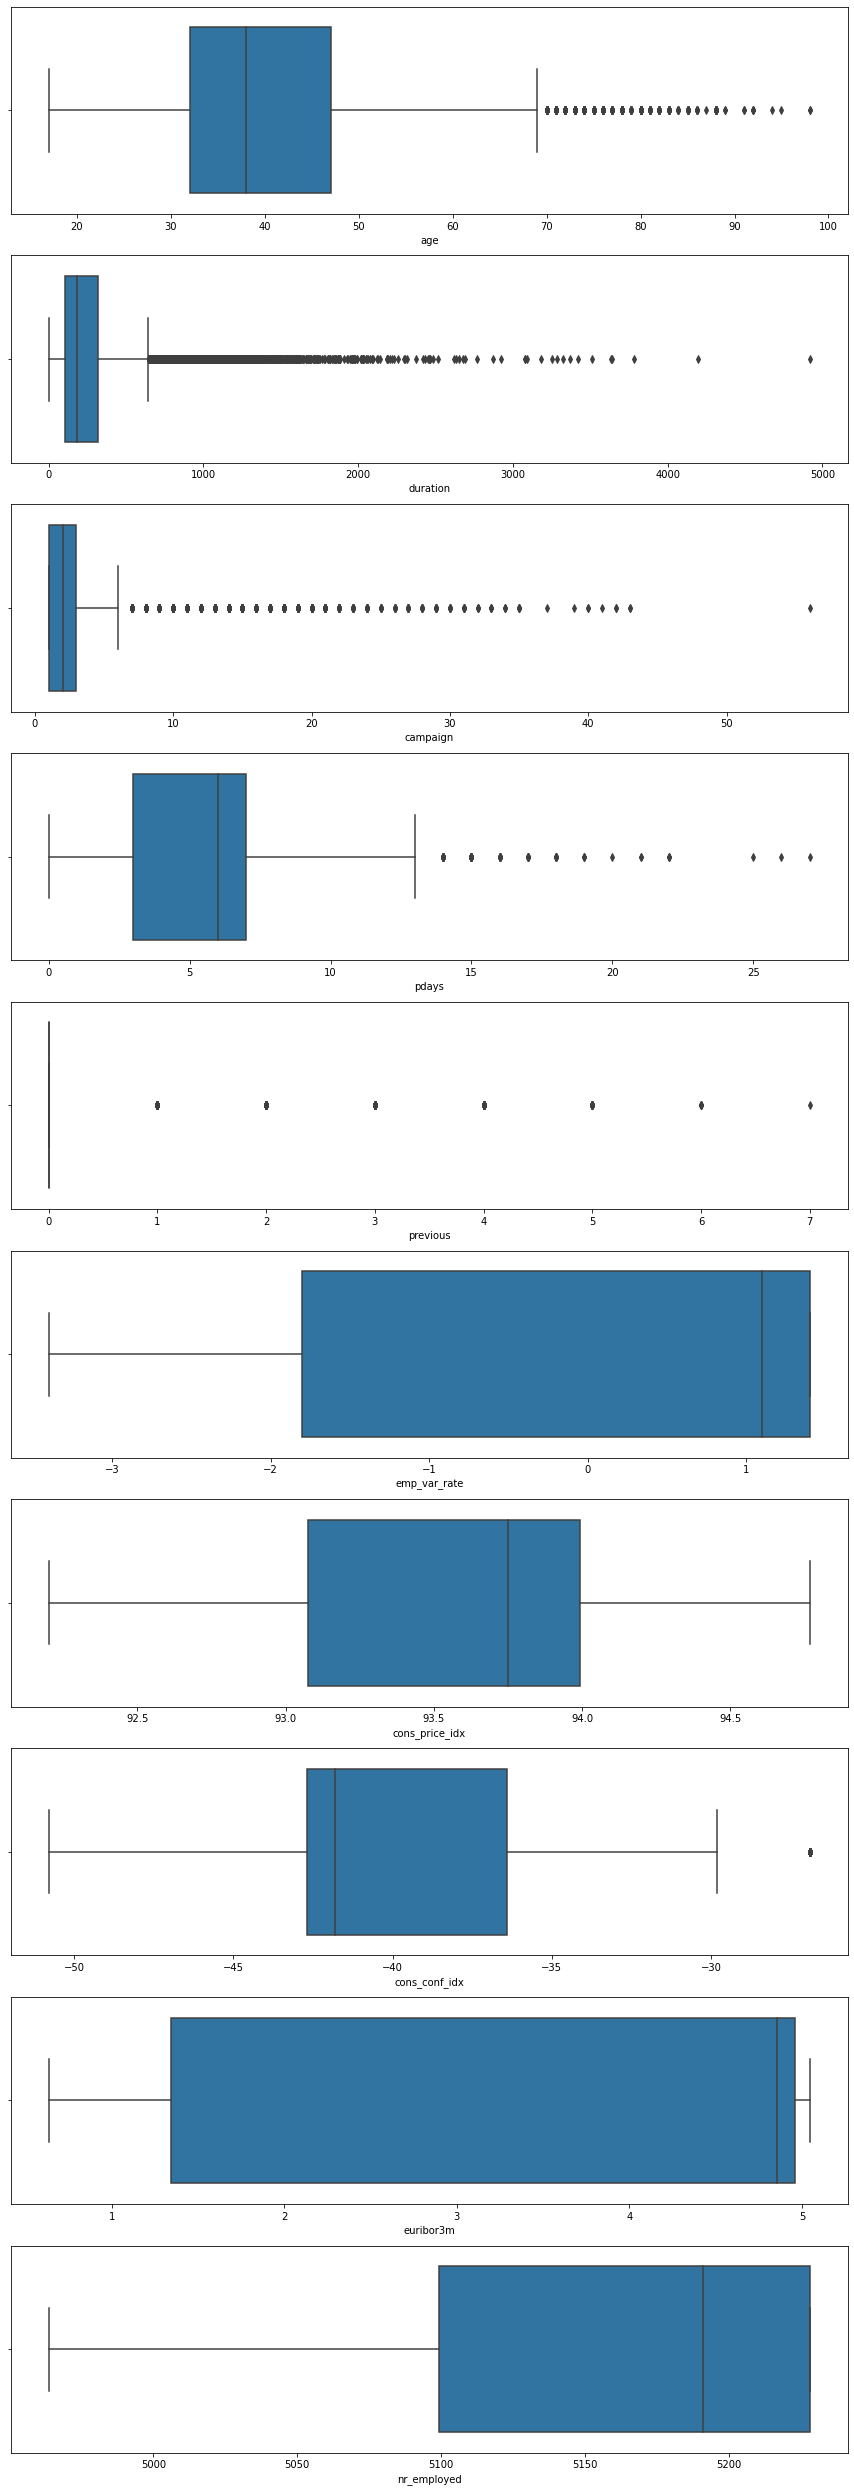

In [19]:
fig, ax = plt.subplots(10, 1, figsize=(15,45))

for i in range(len(df_bank_numericas.columns)):
    sns.boxplot(x=df_bank_numericas.columns[i], data=df_bank_numericas, ax=ax[i])
plt.show()

Identifica sobre el dataframe las filas que son outliers


In [23]:
def detectar_outliers(lista_columnas, dataframe): 
    
    dicc_indices = {} 
    for col in lista_columnas:
        
        Q1 = np.nanpercentile(dataframe[col], 25)
        Q3 = np.nanpercentile(dataframe[col], 75)

        IQR = Q3 - Q1
        
        outlier_step = 1.5 * IQR
        
        outliers_data = dataframe[(dataframe[col] < Q1 - outlier_step) | (dataframe[col] > Q3 + outlier_step)]
        
        
        if outliers_data.shape[0] > 0:
        
            dicc_indices[col] = (list(outliers_data.index)) 
    
    return dicc_indices 

In [24]:
lista_outliers = list(df_bank_numericas.columns)

In [25]:
filas = detectar_outliers(lista_outliers, df_bank_numericas)

In [35]:
filas

{'age': [27713,
  27757,
  27780,
  27800,
  27802,
  27805,
  27808,
  27810,
  27811,
  27812,
  27813,
  27814,
  27815,
  27816,
  27817,
  27818,
  27826,
  27837,
  27838,
  27844,
  27851,
  27875,
  27879,
  27902,
  27930,
  27950,
  27951,
  27963,
  28220,
  28221,
  28312,
  28456,
  28504,
  28530,
  28540,
  28586,
  28619,
  28732,
  28773,
  29225,
  29263,
  29498,
  29625,
  29668,
  29682,
  29973,
  29977,
  29981,
  29987,
  29990,
  30000,
  30004,
  30006,
  30072,
  30078,
  30079,
  30088,
  30103,
  30110,
  30133,
  30171,
  30214,
  30225,
  30227,
  30241,
  30334,
  30335,
  30390,
  30430,
  30460,
  30589,
  35833,
  35848,
  35856,
  35878,
  35973,
  36183,
  36285,
  36311,
  36383,
  36384,
  36816,
  36998,
  37136,
  37137,
  37170,
  37186,
  37190,
  37192,
  37193,
  37195,
  37206,
  37207,
  37213,
  37219,
  37227,
  37235,
  37237,
  37239,
  37257,
  37260,
  37316,
  37341,
  37355,
  37371,
  37403,
  37454,
  37455,
  37472,
  37479,
  3

Reemplaza los outliers por el estadístico más correcto.


In [28]:
df_bank_numericas.iloc[27713]

age                 28.000
duration           143.000
campaign             2.000
pdays                  NaN
previous             0.000
emp_var_rate        -1.800
cons_price_idx      92.843
cons_conf_idx      -50.000
euribor3m            1.799
nr_employed       5099.100
Name: 27721, dtype: float64

In [32]:
for k, v in filas.items():
    mediana = df_bank_numericas[k].median() 
    for i in v: 
        df_bank_numericas.loc[i,k] = mediana

In [34]:
df_bank_numericas.iloc[27757]

age                 34.000
duration           266.000
campaign             1.000
pdays                  NaN
previous             0.000
emp_var_rate        -1.800
cons_price_idx      92.843
cons_conf_idx      -50.000
euribor3m            1.726
nr_employed       5099.100
Name: 27765, dtype: float64

Guarda el csv con las columnas limpias para seguir trabajando con este dataframe limpio en el siguiente pair programming de limpieza.